<a href="https://colab.research.google.com/github/syedamaann/LearningLog/blob/main/00_fundamentals/designpatterns/11_proxypattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# strategy pattern

quick revision:
- Take what varies in a system and encapsulate it.
- Libraries and frameworks often use design patterns in their implementations.
- Understanding design patterns helps in quickly understanding APIs structured around them.
- Design patterns don’t go directly into code but first into your mind; once you’ve learned them, apply them to new designs or rework old code when it becomes inflexible.
- The Strategy Pattern is used to implement various behaviors, such as duck behavior, encapsulating them into separate classes that can be expanded or changed, even at runtime.
- Think at the pattern level, not just at the object level.
- The Strategy Pattern defines a family of algorithms, encapsulates each one, and makes them interchangeable, allowing the algorithm to vary independently of the client using it.
- Pay attention to class relationships:
  - IS-A: Refers to inheritance (e.g., MallardDuck IS-A Duck).
  - HAS-A: Refers to composition (e.g., a duck HAS-A FlyBehavior and QuackBehavior).
  - IMPLEMENTS: Refers to the relationship between a class and an interface (e.g., FlyWithWings IMPLEMENTS FlyBehavior).
- It’s often better for a class to have behavior rather than inherit it—this is called composition.
- Encapsulating what varies reduces unintended consequences from code changes and increases flexibility.
- Separate code that changes frequently from code that remains stable; this improves maintainability and flexibility.
- Load your brain with design patterns so you can recognize when to apply them in your designs and existing applications.
- Use the Strategy Pattern when:
  - There are multiple variations of a behavior.
  - A behavior is likely to change frequently.
  - You want to avoid many conditional statements.
  - You need runtime behavior changes.
  - Code duplication exists across classes.
- Recognize the Strategy Pattern when:
  - Behaviors are encapsulated in separate classes.
  - There’s a context class that holds a reference to a behavior interface.
  - There are setter methods for changing behavior at runtime.
- Determine the need for the Strategy Pattern by asking:
  - Do I have multiple ways to accomplish the same task?
  - Am I using many conditional statements to select a behavior?
  - Do I need to change behavior without affecting class structure?

  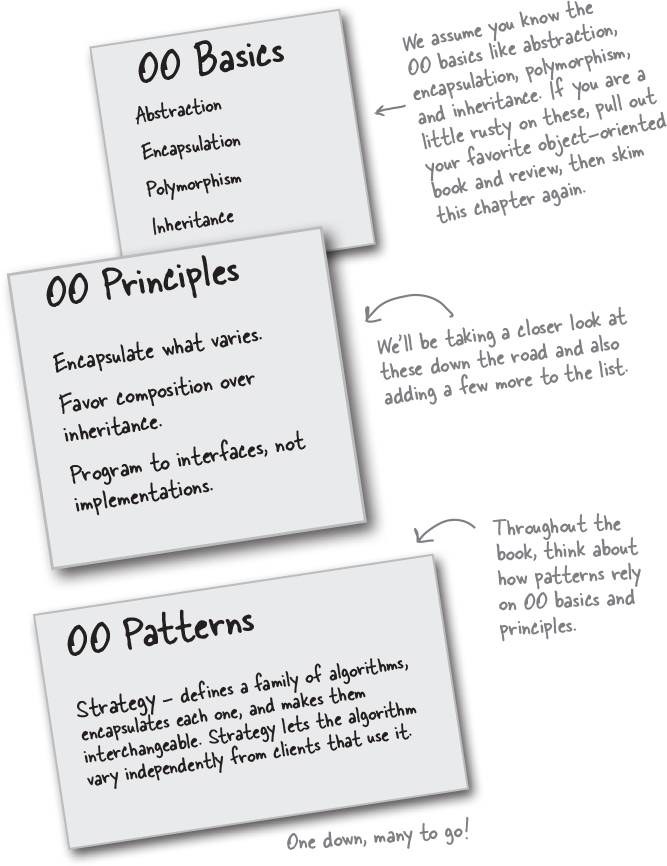

In [73]:
class Flytype:
  def fly(self):
    pass

class Quaktype:
  def quack(self):
    pass

class Duck:
  def __init__(self, flytype: Flytype, quaktype: Quaktype) -> None:
    self.flytype = flytype
    self.quaktype = quaktype

  def setflytype(self, flytype):
    self.flytype = flytype

  def setquaktype(self, quaktype):
    self.quaktype = quaktype

  def fly(self):
    self.flytype.fly()

  def quack(self):
    self.quaktype.quack()

class Flywithwings(Flytype):
  def fly(self):
    print("i can fly with wings")

class Nofly(Flytype):
  def fly(self):
    print("i can't fly")

class Quaksloud(Quaktype):
  def quack(self):
    print("i can quack loud")

class Quackquiet(Quaktype):
  def quack(self):
    print("i can quack quiet")

class Rocketpoweredflying(Flytype):
  def fly(self):
    print("i can fly with rocket power")

In [74]:
duck1 = Duck(Flywithwings(), Quaksloud())
duck2 = Duck(Nofly(), Quackquiet())
duck3 = Duck(Rocketpoweredflying(), Quaksloud())

In [75]:
print(duck1.fly(), duck1.quack())

i can fly with wings
i can quack loud
None None


In [76]:
print(duck2.fly(), duck2.quack())

i can't fly
i can quack quiet
None None


In [77]:
print(duck3.fly(), duck3.quack())

i can fly with rocket power
i can quack loud
None None


In [79]:
duck1.setflytype(Rocketpoweredflying())
duck1.setquaktype(Quackquiet())
print(duck1.fly(), duck1.quack())

i can fly with rocket power
i can quack quiet
None None


# observer pattern

quick revision:

- The **Observer Pattern** defines a **one-to-many relationship** between objects, meaning when one object (the Subject) changes state, all dependent objects (Observers) are notified and updated automatically.
- Observers are **loosely coupled** to the Subject, meaning the Subject only knows that they implement the Observer interface and nothing more about their internal workings.
- Loose coupling makes systems more **flexible** and easier to maintain, as changes in one part of the system don't heavily impact other parts.
- A **tightly coupled** system, on the other hand, is more fragile and harder to modify because objects are overly dependent on each other.
- The **WeatherData class** is an example of a Subject that holds state (e.g., temperature, humidity, pressure), and when these measurements change, it must notify all display elements (Observers).
- The Subject uses a **common interface** to notify Observers about changes, ensuring that updates are handled in a consistent way.
- **Push** vs. **Pull**: You can either push data from the Subject to Observers or have Observers pull data from the Subject. Pulling is considered more "correct" because it gives Observers more control over what they need.
- In the **push** approach, the Subject sends updated data directly to the Observers as arguments in the update call.
- In the **pull** approach, the Subject only notifies Observers that something has changed, and Observers call getter methods on the Subject to pull the data they need.
- **When to use the Observer Pattern**: It’s useful when you have objects that need to stay in sync with changes in another object, but you want to avoid tight coupling. It’s especially helpful if you expect changes in the system over time.
- **How to recognize the Observer Pattern**: Look for scenarios where one object (Subject) needs to notify multiple other objects (Observers) when its state changes, but without knowing the details of those Observers.
- **Common use cases**:
  - User interfaces where multiple elements need to update when data changes (e.g., a weather app with multiple displays).
  - Event handling systems where many listeners need to react to a single event (e.g., GUI button click).
  - Stock market apps where multiple clients observe changes in stock prices.
  - Social media platforms where users follow other users, and any status updates are broadcasted to all followers.
- The Observer Pattern is an example of **minimizing interdependencies** between objects, which makes designs more adaptable to future changes.
- The **one-to-many relationship** and **loose coupling** are key characteristics of the Observer Pattern, allowing for more flexible and maintainable code.
- The design principle behind the Observer Pattern helps ensure that systems can **scale** and **evolve** more easily because the Subject doesn’t need to know specifics about its Observers.

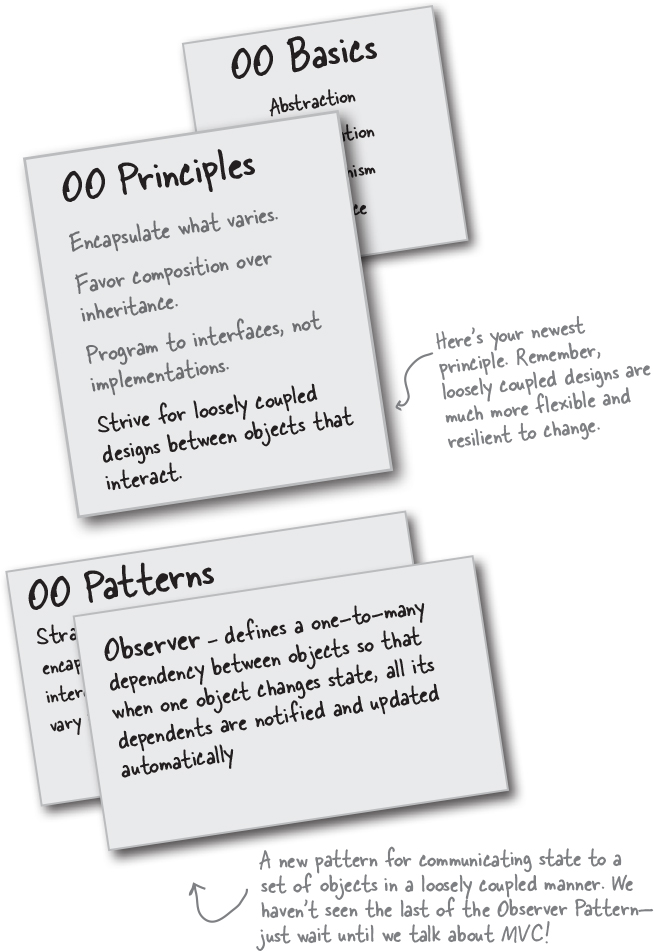

In [27]:
class WeatherData:
  def __init__(self):
    self.observers = []
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def registerObserver(self, observer):
    self.observers.append(observer)

  def removeObserver(self, observer):
    self.observers.remove(observer)

  def notifyObservers(self):
    for observer in self.observers:
      observer.update(self.temperature, self.humidity, self.pressure)

  def setMeasurements(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.notifyObservers()

class Observer:
  def update(self, temperature, humidity, pressure):
    pass

class DisplayElement:
  def display(self):
    pass

class CurrentConditionsDisplay(Observer, DisplayElement):
  def __init__(self):
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def update(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.display()

  def display(self):
    print("Current conditions:", self.temperature, "F degrees and", self.humidity, "% humidity")

class pressureDisplay(Observer, DisplayElement):
  def __init__(self):
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def update(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.display()

  def display(self):
    print("Current pressure:", self.pressure)

class HeatindexDisplay(Observer, DisplayElement):
  def __init__(self):
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def update(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.display()

  def display(self):
    heatindex = (16.923 + (0.185212 * self.temperature) + (5.37941 * self.humidity) - (0.100254 * self.temperature * self.humidity))
    print("Current heat index:", heatindex)


weatherdata = WeatherData()
conditiondisplay = CurrentConditionsDisplay()
pressuredisplay = pressureDisplay()
heatindexdisplay = HeatindexDisplay()
weatherdata.registerObserver(conditiondisplay)
weatherdata.registerObserver(pressuredisplay)
weatherdata.registerObserver(heatindexdisplay)
weatherdata.setMeasurements(80, 65, 30)

Current conditions: 80 F degrees and 65 % humidity
Current pressure: 30
Current heat index: -139.91918999999996


In [29]:
class WeatherDatapull:
  def __init__(self):
    self.observers = []
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0
    self.windspeed = 0

  def registerObserver(self, observer):
    self.observers.append(observer)

  def removeObserver(self, observer):
    self.observers.remove(observer)

  def notifyObservers(self):
    for observer in self.observers:
      observer.update()

  def setMeasurements(self, temperature, humidity, pressure, windspeed):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.windspeed = windspeed
    self.notifyObservers()

  def getTemperature(self):
    return self.temperature

  def getHumidity(self):
    return self.humidity

  def getPressure(self):
    return self.pressure

  def getWindspeed(self):
    return self.windspeed

class Observerpull:
  def update(self):
    pass

class DisplayElementpull:
  def display(self):
    pass

class TemperatureDisplaypull(Observerpull, DisplayElementpull):
  def __init__(self, weatherdata):
    self.weatherdata = weatherdata
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0
    self.windspeed = 0

  def update(self):
    self.temperature = self.weatherdata.getTemperature()
    self.display()

  def display(self):
    print("Current temperature:", self.temperature, "F degrees")


class WindspeedDisplaypull(Observerpull, DisplayElementpull):
  def __init__(self, weatherdata):
    self.weatherdata = weatherdata
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0
    self.windspeed = 0

  def update(self):
    self.windspeed = self.weatherdata.getWindspeed()
    self.display()

  def display(self):
    print("Current windspeed:", self.windspeed, "mph")


weatherdata = WeatherDatapull()
temperaturedisplay = TemperatureDisplaypull(weatherdata)
windspeeddisplay = WindspeedDisplaypull(weatherdata)
weatherdata.registerObserver(temperaturedisplay)
weatherdata.registerObserver(windspeeddisplay)
weatherdata.setMeasurements(80, 65, 30, 10)

Current temperature: 80 F degrees
Current windspeed: 10 mph


# decorator pattern

quick revision:

- The **Decorator Pattern** allows behavior to be added to an object dynamically, without modifying the original object's code.
- Decorators provide a **flexible alternative** to subclassing for extending functionality.
- **Objects can be decorated** at runtime, allowing new behaviors to be attached as needed.
- Multiple decorators can be used to **wrap an object** dynamically, adding layers of functionality.
- **Decorators share the same supertype** as the objects they decorate, ensuring type compatibility through inheritance or interface implementation.
- The **decorator adds behavior** before and/or after delegating the main task to the object it decorates.
- **Decorators act as wrappers**, dynamically adding responsibilities to an object.
- **Overuse of decorators** can result in many small objects and lead to a complex design, so be cautious when applying them.
- **Use decorators when** you need to extend or change behavior without modifying the underlying class.
- **Avoid decorators** when the concrete component’s type is critical, as decorators break code that relies on the concrete type.
- Decorators should be applied in systems where **behavior must change** frequently or where flexibility and extension are important.
- **Composition and delegation** are key concepts in the decorator pattern; they allow new behaviors to be added at runtime.
- **Inheritance is not always ideal** for flexibility—decorators are often a better choice for extending behavior.
- Be selective about where to apply decorators; unnecessary adherence to the **Open-Closed Principle** can make code overly complex.
- Designs should focus on being **easily extendable** to incorporate new behavior without modifying existing code.
- The goal of decorators is to create **flexible, resilient designs** that can adapt to changing requirements.

- **When to use the Decorator Pattern**:
  - When behavior needs to be added to individual objects without affecting other objects of the same class.
  - When subclassing would result in an explosion of classes to manage all combinations of behavior.
  - When you need to **dynamically combine behaviors** at runtime.

- **How to recognize where it's been used**:
  - Look for situations where objects are being "wrapped" with additional behaviors (logging, timing, etc.).
  - Check for the presence of multiple small classes that add functionality in layers, following the same interface or base class as the object they decorate.

- **Popular libraries/frameworks that use decorators**:
  - **Flask** and **Django**: Use decorators for routing and request handling.
  - **Python's built-in `functools.wraps`**: Helps preserve the original function's metadata when it's wrapped by a decorator.
  - **pytest**: Uses decorators to mark test functions for different behaviors (e.g., skipping tests, parameterizing tests).

- **Real-world scenario examples**:
  - **Logging**: Dynamically add logging to methods without modifying the original method.
  - **Security**: Apply security checks (e.g., checking user permissions) before allowing method execution.
  - **Data Validation**: Add data validation to functions that process user input.
  

  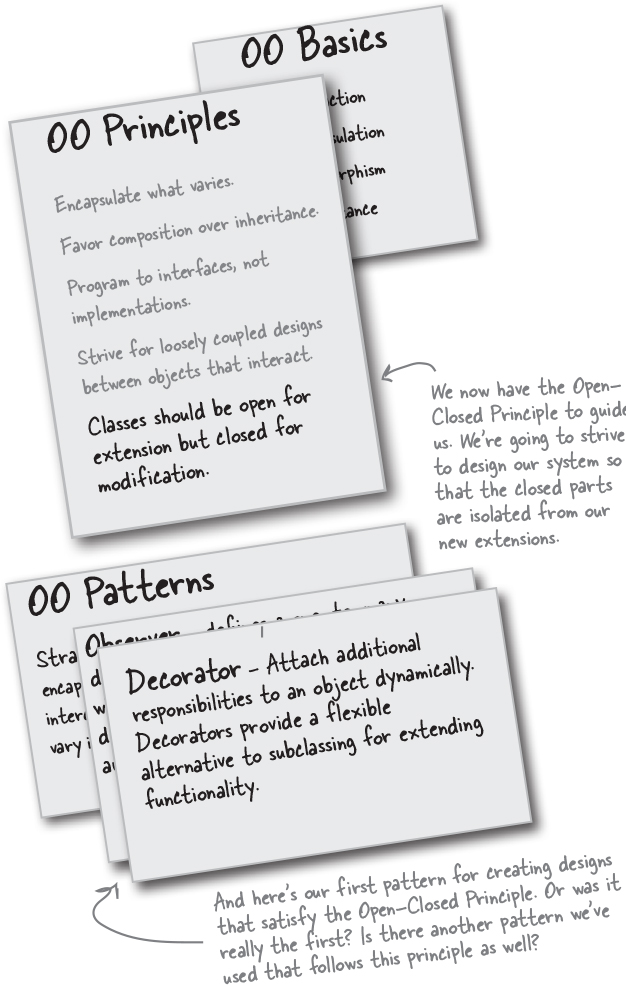
  


In [1]:
from abc import ABC, abstractmethod

class Beverage:
  def __init__(self):
    self.description = "Unknown Beverage"

  def getDescription(self):
    return self.description

  @abstractmethod
  def cost(self):
    pass

class Espresso(Beverage):
  def __init__(self):
    self.description = "Espresso"

  def cost(self):
    return 1.99

class HouseBlend(Beverage):
  def __init__(self):
    self.description = "House Blend Coffee"

  def cost(self):
    return 0.89

class DarkRoast(Beverage):
  def __init__(self):
    self.description = "Dark Roast Coffee"

  def cost(self):
    return 0.99

class CondimentDecorator(Beverage):
  def __init__(self, beverage):
    self.beverage = beverage

  def getDescription(self):
    return self.beverage.getDescription() + ", " + self.description

  @abstractmethod
  def cost(self):
    pass

class Mocha(CondimentDecorator):
  def __init__(self, beverage):
    self.description = "Mocha"
    super().__init__(beverage)

  def cost(self):
    return 0.20 + self.beverage.cost()

class Soy(CondimentDecorator):
  def __init__(self, beverage):
    self.description = "Soy"
    super().__init__(beverage)

  def cost(self):
    return 0.15 + self.beverage.cost()

class Whip(CondimentDecorator):
  def __init__(self, beverage):
    self.description = "Whip"
    super().__init__(beverage)

  def cost(self):
    return 0.1 + self.beverage.cost()

beverage1 = Espresso()
print(beverage1.getDescription(), beverage1.cost())
beverage2 = DarkRoast()
beverage2 = Mocha(beverage2)
beverage2 = Mocha(beverage2)
beverage2 = Whip(beverage2)
print(beverage2.getDescription(), beverage2.cost())

Espresso 1.99
Dark Roast Coffee, Mocha, Mocha, Whip 1.49


# factory method pattern

- The method that creates/returns objects is called the factory method.
- Instantiating means creating an object from a class (e.g., my_obj = MyClass()).
- The factory method instantiates/generates an object (which is an instance of a class). Other methods can use this generated object.
- The factory method returns an object, but it only promises to return something of the abstract type (like Document). The factory method doesn't say which concrete class (like WordDocument or PDFDocument) will be created—this is determined by the subclass.
- When we say the code "uses abstract types," it means the code works with generalized objects (like Document), not caring about the specifics (whether it's WordDocument, PDFDocument, etc.). This decouples the code from the concrete classes and keeps things flexible.
- A concrete class is a fully implemented class. unlike, abstract class that has abstract methods.
- concreate classes can be directly instantiated. abstract classes cannot be directly instantiated because they do not have the implementation of abstract methods.
- Factory Method provides a way to work with abstract types, promoting loose coupling between code and object creation.
- The factory method pattern is often used when the exact type of object to create isn't known until runtime.
- **factory method pattern encapsulates object creation**. leads to more decoupling and flexibility.
- when we say **"depend on abstractions, not on concrete classes"** what we mean is to **depend on generalized classes (like Document), not on concrete classes (like WordDocument or PDFDocument)**.

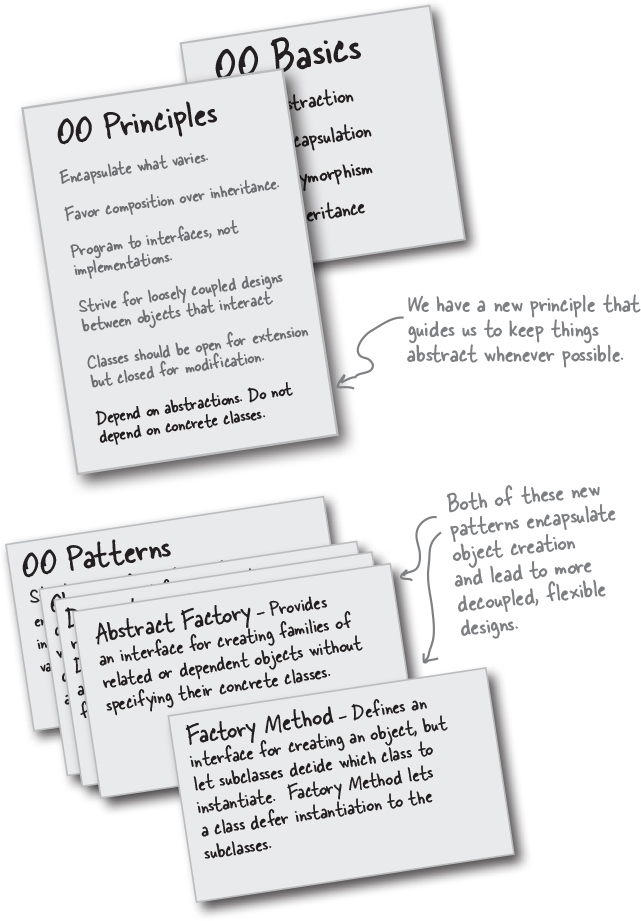

In [15]:
class File(ABC):
  def __init__(self) -> None:
    pass

  @abstractmethod
  def open(self):
    pass

class WordFile(File):
  def __init__(self) -> None:
    pass

  def open(self):
    print("Opening Word File")

class PDFFile(File):
  def __init__(self) -> None:
    pass

  def open(self):
    print("Opening PDF File")

class Application(ABC):
  def __init__(self) -> None:
    pass

  @abstractmethod
  def createfile(self) -> File: # this is a factory method. any method that returns an instantiated object is called a factory method.
    pass

  def openfile(self):
    file = self.createfile()
    file.open()

class WordApplication(Application):
  def __init__(self) -> None:
    pass

  def createfile(self) -> File:
    return WordFile() # this instantiates an object from a class called WordFile

class PDFApplication(Application):
  def __init__(self) -> None:
    pass

  def createfile(self) -> File:
    return PDFFile() # this instantiates an object from a class called PDFFile

application = WordApplication() # here, you've instantiated a class called WordApplication and stored it in a variable called application. you instantiate an object using () at the end of class name.
application.openfile()  # here, you've called a method called openfile from an object instantiated from WordApplication class. this openfile method 1) calls createfile method (its a factory method). createfile method returns an instance of WordFile class. 2) then calls open method on that WordFile class.
application2 = PDFApplication()
application2.openfile()

Opening Word File
Opening PDF File


In [11]:
from abc import ABC, abstractmethod

class Pizza(ABC):
  def __init__(self) -> None:
    self.name = "default pizza"

  def prepare(self):
    print("Preparing " + self.name)

  def bake(self):
    print("Baking " + self.name)

  def cut(self):
    print("Cutting " + self.name)

  def box(self):
    print("Boxing " + self.name)

class NyCheesePizza(Pizza):
  def __init__(self) -> None:
    self.name = "New York Style Cheese Pizza"

class ChicagoCheesePizza(Pizza):
  def __init__(self) -> None:
    self.name = "Chicago Style Cheese Pizza"

class HyderabadCheesePizza(Pizza):
  def __init__(self) -> None:
    self.name = "Hydrabad Style Cheese Pizza"

class NYSpicyPizza(Pizza):
  def __init__(self) -> None:
    self.name = "New York Style Spicy Pizza"

class ChicagoSpicyPizza(Pizza):
  def __init__(self) -> None:
    self.name = "Chicago Style Spicy Pizza"

class HyderabadSpicyPizza(Pizza):
  def __init__(self) -> None:
    self.name = "Hydrabad Style Spicy Pizza"


class PizzaStore(ABC):
  def __init__(self) -> None:
    pass

  @abstractmethod
  def createPizza(self, type) -> Pizza:
    pass

  def orderPizza(self, type):
    pizza = self.createPizza(type)
    pizza.prepare()
    pizza.bake()
    pizza.cut()
    pizza.box()
    return pizza

class NYPizzaStore(PizzaStore):
  def __init__(self) -> None:
    self.name = "New York Pizza Store"

  def createPizza(self, type) -> Pizza:
    if type == "cheese":
      return NyCheesePizza()
    elif type == "spicy":
      return NYSpicyPizza()
    else:
      return None

class ChicagoPizzaStore(PizzaStore):
  def __init__(self) -> None:
    self.name = "Chicago Pizza Store"

  def createPizza(self, type) -> Pizza:
    if type == "cheese":
      return ChicagoCheesePizza()
    elif type == "spicy":
      return ChicagoSpicyPizza()
    else:
      return None

class HyderabadPizzaStore(PizzaStore):
  def __init__(self) -> None:
    self.name = "Hydrabad Pizza Store"

  def createPizza(self, type) -> Pizza:
    if type == "cheese":
      return HyderabadCheesePizza()
    elif type == "spicy":
      return HyderabadSpicyPizza()
    else:
      return None

In [13]:
nypizzastore = NYPizzaStore()
nypizzastore.orderPizza("spicy")

Preparing New York Style Spicy Pizza
Baking New York Style Spicy Pizza
Cutting New York Style Spicy Pizza
Boxing New York Style Spicy Pizza


# singleton pattern

- The Singleton pattern ensures only one instance of a class exists throughout the application's lifetime.
- It provides a global access point to this instance, allowing different parts of the program to use the same instance without reinitializing it.
- The instance creation is controlled through a static method (often named getInstance()), which checks if an instance already exists before creating a new one.
- The class maintains a static attribute _instance initialized to None to store the single instance once created.
- A static method is a method that belongs to the class rather than an instance of the class. It is defined using the @staticmethod decorator and can be called without creating an object. It cannot access instance attributes but can access class-level attributes.
- A static attribute (or class-level attribute) is a variable shared by all instances of the class. Changes to the static attribute will be reflected across all instances.
- The single underscore (e.g., _instance) is a naming convention in Python to indicate that the attribute is intended for internal use only (protected), signaling to developers that it shouldn’t be accessed directly outside the class.
- In multithreaded environments, race conditions can occur if two threads attempt to create the Singleton simultaneously.
- To avoid race conditions, thread locking can be used to ensure only one thread can create the instance at a time.
- Double-checked locking optimizes performance by checking if the instance exists before locking and again inside the lock
- Cloning the Singleton (via shallow or deep copying) can break the pattern, so methods like __copy__ and __deepcopy__ can be overridden to prevent cloning.
- A shallow copy creates a new object but does not create copies of nested objects inside it. Instead, it references the same nested objects, meaning changes to the nested objects affect both the original and the copy.
- A deep copy creates a new object along with new copies of all nested objects inside it. This ensures that changes to the original object do not affect the deep copy.
- Double underscore (e.g., __copy__) triggers name mangling, where Python changes the attribute name internally. This is used to prevent accidental access or overriding in subclasses.
- Common use cases include logging systems, configuration managers, and database connections where a single shared resource is needed.
- A Singleton can often be identified by looking for classes with static methods that manage the creation and return of a single instance.
- To determine if a Singleton is needed, check if multiple parts of the application should share the same data or resource (e.g., configuration, logging, thread pools).
- Design principles in action:
  - Encapsulation: The creation of the instance is encapsulated within the class itself, preventing external access to the constructor.
  - Single Responsibility Principle: The class has one responsibility—to manage its own unique instance.
  - Global Access: It provides a controlled and consistent global access point to a resource.
  - Lazy Instantiation: It delays the object's creation until it is needed, optimizing resource usage.
- Situations where Singleton can be useful include scenarios with shared resources like file systems, network connections, caching mechanisms, or state management.
- A Singleton should not be used if the class needs to support multiple configurations or distinct instances (e.g., different databases).
- Misuse of Singletons can lead to issues like hidden dependencies, global state, and difficulty in unit testing. Consider alternatives like dependency injection when possible.

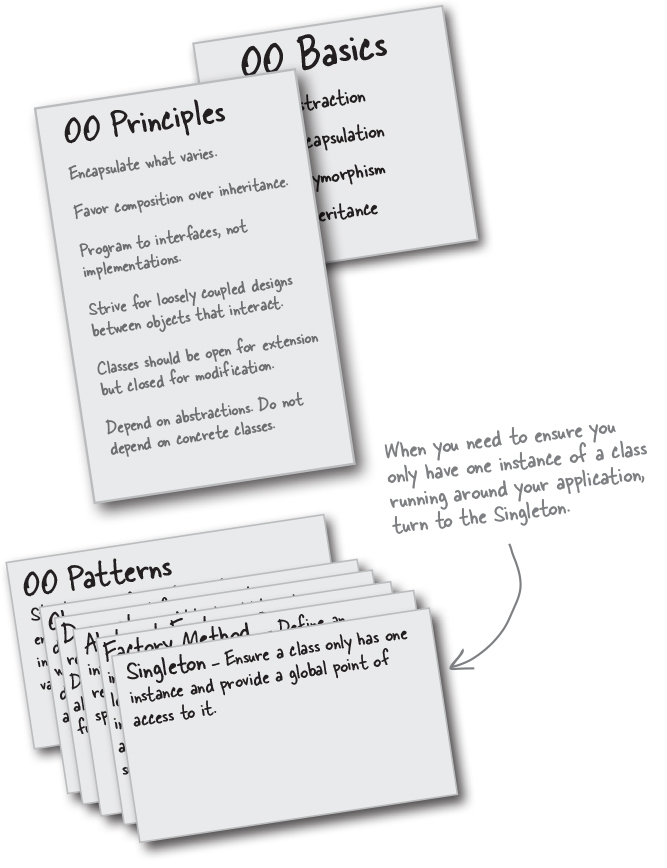

In [1]:
class Singletonclass:
  _instance = None

  @staticmethod
  def getInstance():
    if Singletonclass._instance == None:
      Singletonclass._instance = Singletonclass()
    return Singletonclass._instance

In [8]:
instance1 = Singletonclass.getInstance()

In [9]:
instance2 = Singletonclass.getInstance()

In [10]:
instance1 == instance2

True

In [11]:
import threading

class Singletonclassmultithread:
  _instance = None
  _lock = threading.Lock()

  @staticmethod
  def getInstance():
    with Singletonclassmultithread._lock:
      if Singletonclassmultithread._instance == None:
        Singletonclassmultithread._instance = Singletonclassmultithread()
    return Singletonclassmultithread._instance

In [12]:
import threading

class Singletonclassmultithreadbetter:
  _instance = None
  _lock = threading.Lock()

  @staticmethod
  def getInstance():
    if Singletonclassmultithreadbetter._instance == None:
      with Singletonclassmultithreadbetter._lock:
        if Singletonclassmultithreadbetter._instance == None:
          Singletonclassmultithreadbetter._instance = Singletonclassmultithreadbetter()
    return Singletonclassmultithreadbetter._instance

# command pattern

- The **Command Pattern** encapsulates a request or action as an object, allowing for the parameterization of actions and the decoupling of the sender from the receiver.
- It works by separating the object that invokes the action (Invoker) from the object that performs the action (Receiver).
- A **Command** object encapsulates the action by implementing an `execute()` method and optionally `undo()` and `redo()` methods to reverse or reapply the action.
- The **Invoker** triggers the command by calling `execute()`, but it doesn't need to know details of the action or the receiver.
- The **Receiver** is the actual object that performs the action (e.g., a device in a smart home system).
- Command objects also store state if needed for undo/redo functionality (e.g., storing previous state before executing a command).
- Use the Command Pattern when you need to **decouple** the object that requests an operation from the one that performs it.
- It's particularly useful when you need to implement **undo/redo** functionality or queue operations to be executed later.
- The pattern is helpful when you want to parameterize objects with operations, such as using a command to trigger different actions at runtime.
- You can identify the need for a Command Pattern when you notice operations that need to be handled uniformly (e.g., turning on/off various devices) or when different actions are requested dynamically.
- Real-world use cases include **smart home systems**, **menu actions** in graphical user interfaces (GUIs), **transaction systems** that need rollback functionality, and **task scheduling** systems.
- The pattern enhances flexibility by allowing commands to be **stacked, queued, or logged**, making it easy to support undo/redo or batch processing.
- A challenge is the potential for a large number of command classes if there are many different actions, leading to increased complexity.
- Mitigate this challenge by grouping similar actions under a common interface or using **composite commands** to reduce the number of separate classes.
- Another challenge is managing **state**, especially with undo/redo logic, which can be mitigated by ensuring each command properly tracks previous state.
- The Command Pattern may introduce unnecessary overhead if the actions are simple and don't require undo/redo, so it's best applied when operations involve complex sequences or state changes.

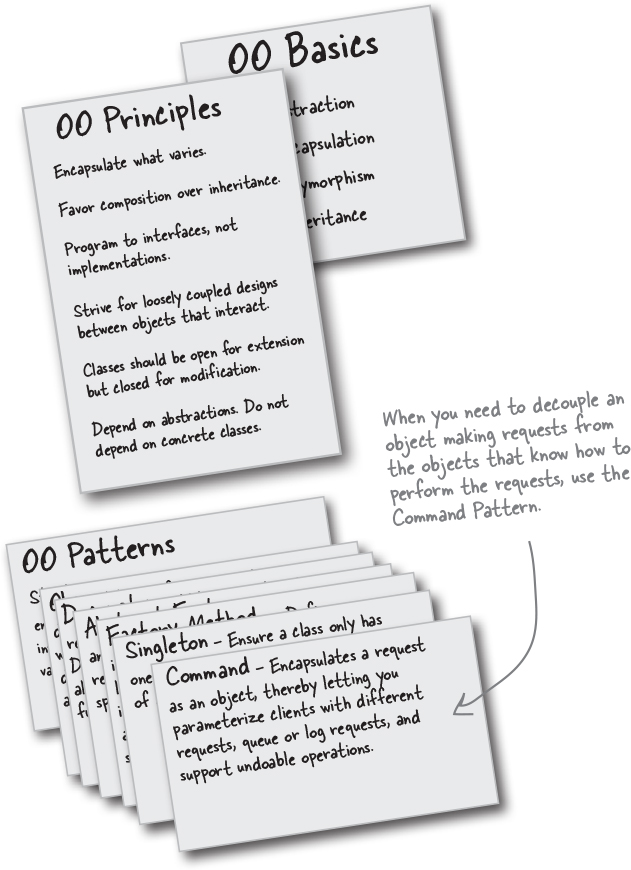

In [6]:
class Command:
  def __init__(self) -> None:
    pass
  def execute(self):
    pass

class LightOnCommand(Command):
  def __init__(self, light) -> None:
    self.light = light

  def execute(self):
    self.light.turn_on()

class LightOffCommand(Command):
  def __init__(self, light) -> None:
    self.light = light

  def execute(self):
    self.light.turn_off()

class Remote:
  def __init__(self, command):
    self.command = command

  def press(self):
    self.command.execute()

class Light:
  def turn_on(self):
    print("Light turned on")

  def turn_off(self):
    print("Light turned off")

remote = Remote(LightOnCommand(Light()))
remote.press()
remote = Remote(LightOffCommand(Light()))
remote.press()

Light turned on
Light turned off


In [4]:
# Imagine a text editor that allows users to type, cut, copy, and paste text. We’ll implement these actions using the Command pattern.

class Editor:
  def __init__(self) -> None:
    self.text = ""
    self.clipboard = ""

  def type(self, text):
    self.text += text
    print(f"Typed text: {self.text}")


  def cut(self):
    self.clipboard = self.text
    self.text = ""
    print(f"cut text: {self.clipboard}")

  def copy(self):
    self.clipboard += self.text
    print(f"copied text: {self.clipboard}")

  def paste(self):
    self.text += self.clipboard
    print(f"pasted text: {self.text}")

class Invoker:
  def __init__(self) -> None:
    pass

  def set_command(self, command):
    self.command = command

  def execute(self):
    self.command.execute()

class Command:
  def __init__(self) -> None:
    pass

  def execute(self):
    pass

class TypeCommand(Command):
  def __init__(self, editor, text) -> None:
    self.editor = editor
    self.text = text

  def execute(self):
    self.editor.type(self.text)

class CutCommand(Command):
  def __init__(self, editor) -> None:
    self.editor = editor

  def execute(self):
    self.editor.cut()

class CopyCommand(Command):
  def __init__(self, editor) -> None:
    self.editor = editor

  def execute(self):
    self.editor.copy()

class PasteCommand(Command):
  def __init__(self, editor) -> None:
    self.editor = editor

  def execute(self):
    self.editor.paste()

In [8]:
texteditor = Editor()
invoker = Invoker()
invoker.set_command(TypeCommand(texteditor, "hello its me"))
invoker.execute()
invoker.set_command(CutCommand(texteditor))
invoker.execute()
invoker.set_command(CopyCommand(texteditor))
invoker.execute()
invoker.set_command(PasteCommand(texteditor))
invoker.execute()

Typed text: hello its me
cut text: hello its me
copied text: hello its me
pasted text: hello its me


In [35]:
class TextEditor:
  def __init__(self) -> None:
    self.text = ""
    self.clipboard = ""

  def type(self, text):
    self.text += text
    print(f"Typed text: {self.text}")

  def cut_command(self):
    self.clipboard = self.text
    self.text = ""
    print(f"cut text: {self.clipboard}")

  def copy_command(self):
    self.clipboard += self.text
    print(f"copied text: {self.clipboard}")

  def paste_command(self):
    self.text += self.clipboard
    print(f"pasted text: {self.text}")

class Command:
  def __init__(self) -> None:
    pass

  def execute(self):
    pass

  def undo(self):
    pass

class TypeCommand(Command):
  def __init__(self, editor, text) -> None:
    self.editor = editor
    self.text = text
    self.previous_state = None

  def execute(self):
    self.previous_state = self.editor.text
    self.editor.type(self.text)

  def undo(self):
    self.editor.text = self.previous_state
    print(f"Undo typed text: {self.editor.text}")

class CutCommand(Command):
  def __init__(self, editor) -> None:
    self.editor = editor
    self.previous_state = None

  def execute(self):
    self.previous_state = self.editor.text
    self.editor.cut_command()

  def undo(self):
    self.editor.text = self.previous_state
    print(f"Undo cut text: {self.editor.text}")

class CopyCommand(Command):
  def __init__(self, editor) -> None:
    self.editor = editor
    self.previous_state = None

  def execute(self):
    self.previous_state = self.editor.text
    self.editor.copy_command()

  def undo(self):
    self.editor.text = self.previous_state
    print(f"Undo copied text: {self.editor.text}")

class PasteCommand(Command):
  def __init__(self, editor) -> None:
    self.editor = editor
    self.previous_state = None

  def execute(self):
    self.previous_state = self.editor.text
    self.editor.paste_command()

  def undo(self):
    self.editor.text = self.previous_state
    print(f"Undo pasted text: {self.editor.text}")

class Invoker:
  def __init__(self) -> None:
    self.command = None
    self.history = []
    self.redo_stack = []

  def set_command(self, command):
    self.command = command

  def execute(self):
    self.command.execute()
    self.history.append(self.command)
    self.redo_stack.clear()

  def undo(self):
    if self.history:
      command = self.history.pop()
      command.undo()
      self.redo_stack.append(command)

  def redo(self):
    if self.redo_stack:
      command = self.redo_stack.pop()
      command.execute()
      self.history.append(command)

In [37]:
editor = TextEditor()
invoker = Invoker()


type_hello = TypeCommand(editor, "Hello")
type_world = TypeCommand(editor, " World")
cut_command = CutCommand(editor)
copy_command = CopyCommand(editor)
paste_command = PasteCommand(editor)

invoker.set_command(type_hello)
invoker.execute()
invoker.set_command(type_world)
invoker.execute()
invoker.undo()
invoker.redo()
print("\n")

invoker.set_command(cut_command)
invoker.execute()
invoker.undo()
invoker.redo()
print("\n")

invoker.set_command(copy_command)
invoker.execute()
invoker.undo()
invoker.redo()
print("\n")

invoker.set_command(paste_command)
invoker.execute()
invoker.undo()
invoker.redo()
print("\n")

Typed text: Hello
Typed text: Hello World
Undo typed text: Hello
Typed text: Hello World


cut text: Hello World
Undo cut text: Hello World
cut text: Hello World


copied text: Hello World
Undo copied text: 
copied text: Hello World


pasted text: Hello World
Undo pasted text: 
pasted text: Hello World




In [65]:
# We have a smart home system that controls devices like lights, fans, and thermostats.
# We want to send commands to these devices to turn them on/off, change settings, and implement undo/redo functionality.

class Devices:
  def __init__(self) -> None:
    self.name = ""

  def turn_on(self):
    pass

  def turn_off(self):
    pass

  def change_settings(self):
    pass

class Light(Devices):
  def __init__(self) -> None:
    self.name = "Light"

  def turn_on(self):
    print(f"{self.name} turned on")

  def turn_off(self):
    print(f"{self.name} turned off")

  def change_settings(self):
    print(f"{self.name} changed settings")

class Fans(Devices):
  def __init__(self) -> None:
    self.name = "Fans"
    self.speed = 0

  def turn_on(self):
    print(f"{self.name} turned on")

  def turn_off(self):
    print(f"{self.name} turned off")

  def set_speed(self, speed):
    if speed >= 0 and speed <= 5:
      self.speed = speed
      print(f"{self.name} set speed to {speed}")
    else:
      print(f"{self.name} speed must be between 1 and 5")

class Thermostats(Devices):
  def __init__(self) -> None:
    self.name = "Thermostats"
    self.temp = 22

  def turn_on(self):
    print(f"{self.name} turned on")

  def turn_off(self):
    print(f"{self.name} turned off")

  def set_temp(self, temp):
    if temp > 0 and temp <= 40:
      self.temp = temp
      print(f"{self.name} set temp to {temp}")
    else:
      print(f"{self.name} temp must be between 1 and 40")

class SmarthomeCommand:
  def __init__(self) -> None:
    pass

  def execute(self):
    pass

  def undo(self):
    pass

class TurnOnCommand(SmarthomeCommand):
  def __init__(self, device) -> None:
    self.device = device

  def execute(self):
    self.device.turn_on()

  def undo(self):
    self.device.turn_off()

class TurnOffCommand(SmarthomeCommand):
  def __init__(self, device) -> None:
    self.device = device

  def execute(self):
    self.device.turn_off()

  def undo(self):
    self.device.turn_on()

class SetspeedCommand(SmarthomeCommand):
  def __init__(self, device: Fans, speed: int) -> None:
    self.device = device
    self.speed = speed
    self.previous_speed = speed

  def execute(self):
    self.previous_speed = self.device.speed
    self.device.set_speed(self.speed)

  def undo(self):
    self.device.set_speed(self.previous_speed)

class SettempCommand(SmarthomeCommand):
  def __init__(self, device: Thermostats, temp: int) -> None:
    self.device = device
    self.temp = temp
    self.previous_temp = device.temp

  def execute(self):
    self.previous_temp = self.device.temp
    self.device.set_temp(self.temp)

  def undo(self):
    self.device.set_temp(self.previous_temp)

class Invoker:
  def __init__(self, device):
    self.device = device
    self.history = []
    self.redo_stack = []

  def set_command(self, command):
    self.command = command

  def execute(self):
    self.command.execute()
    self.history.append(self.command)
    self.redo_stack.clear()

  def undo(self):
    command = self.history.pop()
    command.undo()
    self.redo_stack.append(command)

  def redo(self):
    command = self.redo_stack.pop()
    command.execute()

In [66]:
light = Light()
fan = Fans()
thermostat = Thermostats()

light_invoker = Invoker(light)
fan_invoker = Invoker(fan)
thermostat_invoker = Invoker(thermostat)

light_invoker.set_command(TurnOnCommand(light))
light_invoker.execute()
light_invoker.undo()
light_invoker.redo()

print("\n")

fan_invoker.set_command(SetspeedCommand(fan, 3))
fan_invoker.execute()
fan_invoker.undo()
fan_invoker.redo()

print("\n")

thermostat_invoker.set_command(SettempCommand(thermostat, 18))
thermostat_invoker.execute()
thermostat_invoker.undo()
thermostat_invoker.redo()

Light turned on
Light turned off
Light turned on


Fans set speed to 3
Fans set speed to 0
Fans set speed to 3


Thermostats set temp to 18
Thermostats set temp to 22
Thermostats set temp to 18


# Adapter and Facade Pattern

- Adapter pattern is used when two interfaces are incompatible but need to work together.
- Facade pattern simplifies a complex subsystem by providing a unified, easy-to-use interface.
- Adapter is useful when you cannot modify the existing class but need it to be compatible with the rest of your system.
- Facade is applied when you want to simplify interactions with multiple subsystems, making them easier to use by clients.
- Adapter converts the interface of a class into another interface expected by clients, without changing the actual class.
- Facade hides the complexity of multiple subsystems behind a clean interface, making it easier for clients to interact with complex systems.
- Adapter can be recognized when a system requires a class to be compatible with an external interface without altering the class itself.
- Facade can be recognized when a client interacts with a simplified interface that handles complex workflows behind the scenes.
- Adapter example: A class with `start()` method being adapted to a client expecting a `play()` method, like adapting different APIs to a standard interface.
- Facade example: Simplifying a travel booking process (flights, hotels, cars) using a single method instead of handling each subsystem separately.
- Adapter uses the design principle of **composition** by wrapping an incompatible object and converting its interface.
- Facade uses **encapsulation** by hiding the internal details of subsystems and providing a high-level interface.
- Adapter enhances reusability and maintainability by making incompatible classes work together without modifying them.
- Facade improves usability and reduces the learning curve by shielding clients from complex or tedious subsystem interactions.
- Adapter is often used in integration scenarios, like when connecting third-party libraries or APIs.
- Facade is used in systems where subsystems are complex, but clients only need a simplified, higher-level interface, like in APIs or software toolkits.
- Adapter focuses on converting incompatible interfaces; Facade focuses on simplifying and reducing the surface area of a system.
- Adapter solves compatibility issues, while Facade hides complexity, making both useful for different aspects of system design.

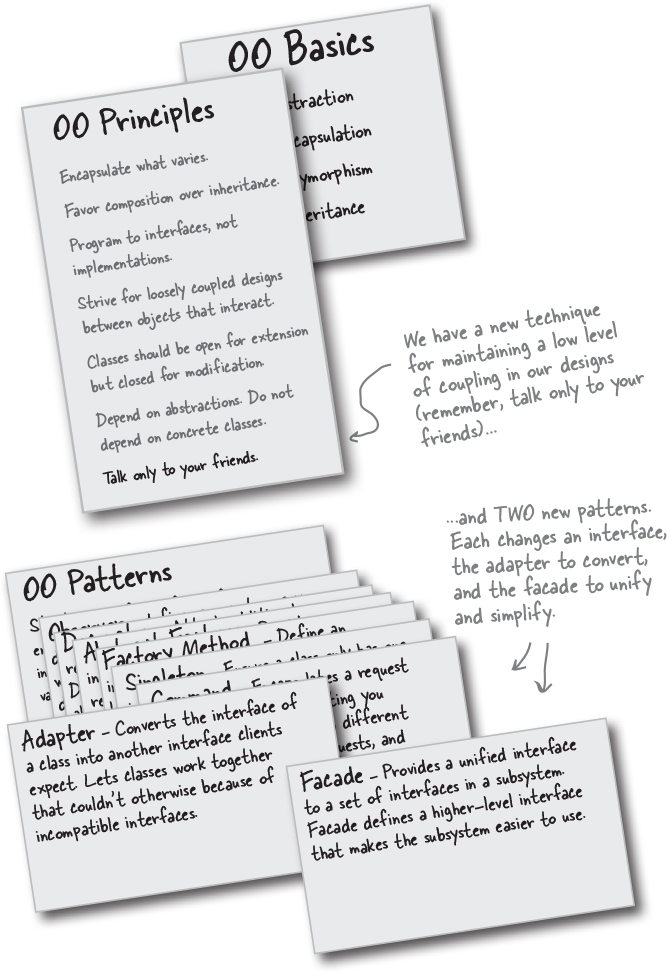

In [3]:
class Mediaplayer:
  def play(self):
    print("Playing media")

class Videoplayer:
  def start(self):
    print("Starting video")

class Adapter:
  def __init__(self, videoplayer):
    self.videoplayer = videoplayer

  def play(self):
    self.videoplayer.start()


videoplayer = Videoplayer()
adapter = Adapter(videoplayer)

adapter.play()

Starting video


In [6]:
class Light:
  def turn_on(self):
    print("Light turned on")
  def turn_off(self):
    print("Light turned off")

class TV:
  def power_on(self):
    print("TV turned on")
  def power_off(self):
    print("TV turned off")

class AC:
  def start(self):
    print("AC started")
  def stop(self):
    print("AC stopped")

class Homeautomation:
  def __init__(self):
    self.light = Light()
    self.tv = TV()
    self.ac = AC()

  def startall(self):
    self.light.turn_on()
    self.tv.power_on()
    self.ac.start()

  def stopall(self):
    self.light.turn_off()
    self.tv.power_off()
    self.ac.stop()

homeautomation = Homeautomation()
homeautomation.startall()
print("\n")
homeautomation.stopall()

Light turned on
TV turned on
AC started


Light turned off
TV turned off
AC stopped


In [17]:
# Imagine you are working with a payment gateway, and you want to integrate different payment providers into your system.
# However, each provider has its own API, which isn't compatible with your system's payment interface.
# You can use the Adapter pattern to make them compatible.

# You have two payment providers, PayPal and Stripe, with different interfaces.
# Your system expects them to implement a PaymentProcessor interface.

class Paymentprocessor:
  def processpayment(self, amount):
    pass

class Paypal:
  def send_payment(self, amount):
    print(f"processed ${amount} via paypal")

class Stripe:
  def make_payment(self, amount):
    print(f"processed ${amount} via stripe")

class Paypaladapter():
  def __init__(self, paypal):
    self.paypal = paypal

  def processpayment(self, amount):
    self.paypal.send_payment(amount)

class StripeAdapter():
  def __init__(self, stripe):
    self.stripe = stripe

  def processpayment(self, amount):
    self.stripe.make_payment(amount)

In [18]:
paypal = Paypal()
stripe = Stripe()

paypaladapter = Paypaladapter(paypal)
stripeAdapter = StripeAdapter(stripe)

paypaladapter.processpayment(100)
stripeAdapter.processpayment(150)

def process_transaction(processor, amount):
  processor.processpayment(amount)

process_transaction(paypaladapter, 200)
process_transaction(stripeAdapter, 250)

processed $100 via paypal
processed $150 via stripe
processed $200 via paypal
processed $250 via stripe


In [19]:
# You want to provide a simple way for a user to book an entire trip (flight, hotel, car)
# without needing to directly interact with each subsystem individually.

class Flightbooking:
  def book_flight(self, flight_number):
    print(f"Flight booked: {flight_number}")

class Hotelbooking:
  def book_hotel(self, hotel_name):
    print(f"Hotel booked: {hotel_name}")

class Carbooking:
  def book_car(self, car_model):
    print(f"Car booked: {car_model}")

class Tripbooking:
  def __init__(self):
    self.flightbooking = Flightbooking()
    self.hotelbooking = Hotelbooking()
    self.carbooking = Carbooking()

  def book_trip(self, flight_number, hotel_name, car_model):
    self.flightbooking.book_flight(flight_number)
    self.hotelbooking.book_hotel(hotel_name)
    self.carbooking.book_car(car_model)

tripbooking = Tripbooking()
tripbooking.book_trip("AA123", "Hotel A", "Car X")

Flight booked: AA123
Hotel booked: Hotel A
Car booked: Car X


# template method pattern

- Template Method defines the **skeleton of an algorithm** in the base class, delegating specific steps to subclasses.
- Base class contains a **template method** that defines the flow of the algorithm.
- Subclasses override certain **abstract methods** to customize parts of the algorithm.
- **Concrete methods** in the base class are shared across all subclasses and provide fixed steps in the algorithm.
- **Hook methods** provide optional extension points for subclasses; they have default implementations but can be overridden.
- Template Method allows **code reuse** by defining common logic in the base class and enabling customization of specific parts in subclasses.
- Subclasses cannot alter the algorithm's structure but can provide their own implementations for particular steps.
- Enforces **algorithm consistency** and prevents modification of critical steps by ensuring the overall structure remains the same.
- Promotes the **open/closed principle**, allowing extension of behavior without modifying the core algorithm.
- Good for scenarios where many parts of an algorithm are common across different implementations, but some steps vary.
- Can be overused, leading to **rigidity** if subclasses need significant variation, making maintenance harder.
- Template Method improves **readability** and **maintenance** by centralizing common steps but can become **complex** with many subclasses.
- Suitable for **frameworks** and libraries where common workflows are required but need some customization (e.g., UI rendering, data processing).
- Abstract methods enforce **implementation requirements**, while hook methods allow for optional customization.
- Can be combined with patterns like **Factory Method** for object creation within the template or **Decorator** to add dynamic behavior.
- **Thread-safety** and **asynchronous operations** should be carefully considered when using the pattern in multithreaded or async environments.
- Changes to the base class must be managed carefully to avoid breaking all subclasses—use default hook methods for extensibility.
- When comparing to other patterns: Template Method **fixes the algorithm structure**, unlike Strategy, which swaps entire algorithms, and unlike Chain of Responsibility, which passes responsibility through handlers.
- Hook methods are called "hook methods" because they act as hooks that allow subclasses to "hook into" or optionally modify certain steps of an algorithm without being required to override them. They provide extension points in the template method where additional or alternative behavior can be introduced by subclasses.

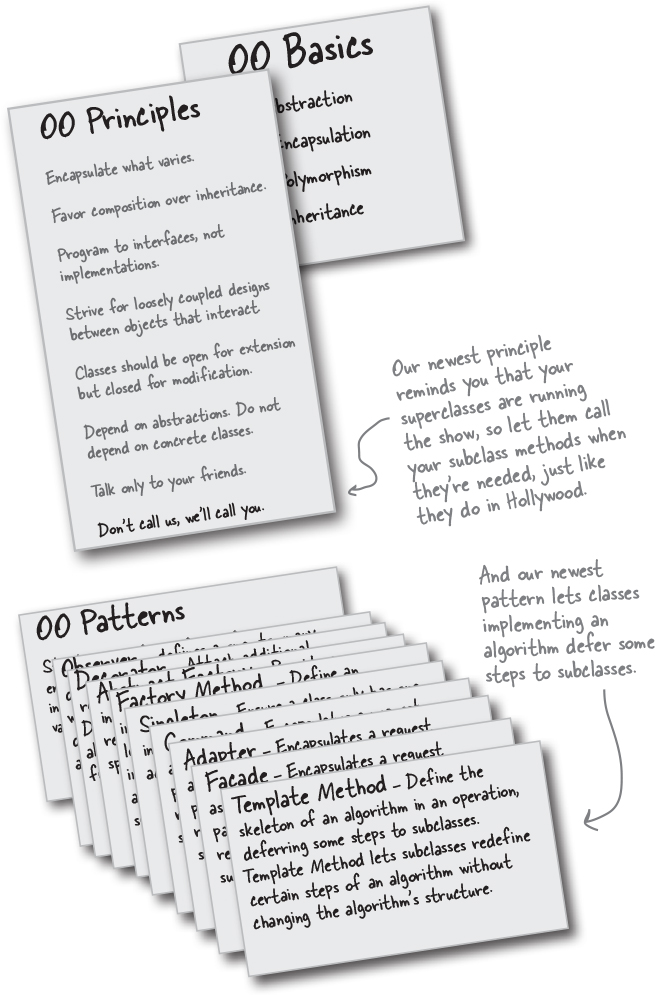

In [1]:
from abc import ABC, abstractmethod

class Dataprocessor(ABC):
  def process(self):
    self.read_data()
    self.process_specific_data()
    self.save_data()

  def read_data(self):
    print("Reading data")

  @abstractmethod
  def process_specific_data(self):
    pass

  def save_data(self):
    print("Saving data")

class PDFprocessor(Dataprocessor):
  def process_specific_data(self):
    print("Processing PDF data")

class CSVprocessor(Dataprocessor):
  def process_specific_data(self):
    print("Processing CSV data")

class XMLprocessor(Dataprocessor):
  def process_specific_data(self):
    print("Processing XML data")

pdfprocessor = PDFprocessor()
pdfprocessor.process()
print("\n")

csvprocessor = CSVprocessor()
csvprocessor.process()
print("\n")

xmlprocessor = XMLprocessor()
xmlprocessor.process()
print("\n")

Reading data
Processing PDF data
Saving data


Reading data
Processing CSV data
Saving data


Reading data
Processing XML data
Saving data




In [2]:
class Game(ABC):
  def play(self):
    self.startgame()
    while not self.is_game_over():
      self.playgame()
    self.endgame()

  @abstractmethod
  def startgame(self):
    pass

  @abstractmethod
  def playgame(self):
    pass

  @abstractmethod
  def is_game_over(self):
    pass

  def endgame(self):
    print("Game ended")

class Chess(Game):
  def startgame(self):
    print("Starting chess game: set up board and pieces")

  def playgame(self):
    print("Playing chess game: move a piece")

  def is_game_over(self):
    print("Checking if game is over")
    return True

class Soccer(Game):
  def startgame(self):
    print("Starting soccer game: set up team and pitch")

  def playgame(self):
    print("Playing soccer game: score a goal")

  def is_game_over(self):
    print("Checking if game is over")
    return True

chess = Chess()
chess.play()
print("\n")

soccer = Soccer()
soccer.play()

Starting chess game: set up board and pieces
Checking if game is over
Game ended


Starting soccer game: set up team and pitch
Checking if game is over
Game ended


In [3]:
# You’ll implement a report generation system where different types of reports (e.g., PDF and HTML reports) follow a similar process:
# Load data
# Format the data
# Generate the report
# Export the report
# The challenge is to customize how different types of reports handle formatting and exporting, while keeping the core workflow consistent.

class Reportgenerator(ABC):
  def generate(self):
    self.load_data()
    self.format_data()
    self.generate_report()
    self.export_report()

  def load_data(self):
    print("Loading data")

  def format_data(self):
    print("Formatting data")

  @abstractmethod
  def generate_report(self):
    pass

  @abstractmethod
  def export_report(self):
    pass

class PDFreportgenerator(Reportgenerator):
  def generate_report(self):
    print("Generating PDF report")

  def export_report(self):
    print("Exporting PDF report")

class HTMLreportgenerator(Reportgenerator):
  def generate_report(self):
    print("Generating HTML report")

  def export_report(self):
    print("Exporting HTML report")

pdfreportgenerator = PDFreportgenerator()
pdfreportgenerator.generate()
print("\n")

htmlreportgenerator = HTMLreportgenerator()
htmlreportgenerator.generate()

Loading data
Formatting data
Generating PDF report
Exporting PDF report


Loading data
Formatting data
Generating HTML report
Exporting HTML report


# iterator and composer patterns

- Iterator pattern provides a way to access elements of a collection sequentially without exposing its underlying structure.
- Iterator pattern abstracts the traversal logic, making it possible to traverse complex data structures uniformly.
- The key methods in an iterator are `has_next()` and `next()` to manage traversal.
- Reverse iterators and filtered iterators are common variations of the pattern.
- The iterator pattern helps decouple the collection from its traversal logic, improving flexibility.
- In Python, the `__iter__()` and `__next__()` methods implement iteration, aligning with Python's iterator protocol.
- Iterators are used in collections like lists, dictionaries, sets, and custom classes requiring traversal.
- Composite pattern allows treating individual objects and compositions of objects uniformly.
- Composite pattern defines a class hierarchy where leaf objects (like files) and composites (like directories) implement the same interface.
- Composite pattern relies on recursive structures where components (leaf or composite) can hold references to other components.
- Composite structures often use a common interface with operations like `add()`, `remove()`, and `display()`.
- Real-world use cases of Composite include file systems, GUI components (e.g., buttons, windows), and menus.
- Composite pattern provides flexibility in managing hierarchies, making it easy to add/remove components dynamically.
- Iterator and Composite patterns are often used together, enabling traversal of complex composite structures like tree hierarchies.
- Composite pattern's downside is increased complexity when managing hierarchies that contain large numbers of components.
- Iterator pattern simplifies traversal but requires careful attention to resource management (e.g., closing connections) in some cases.
- Both patterns support the **Single Responsibility Principle** by separating object structure (Composite) from traversal (Iterator).
- Iterator pattern follows the **Open/Closed Principle** by allowing new traversal types (e.g., reverse or filtered) without modifying existing code.
- Composite pattern can lead to **excessive recursive calls** in deep hierarchies, requiring careful design to avoid performance bottlenecks.
- Iterators can hide complex iteration logic from the client, making collections easier to work with.
- Composite pattern promotes **uniformity** in handling objects and compositions but can **blur the distinction** between individual and composite objects.
- A key mitigation for Composite complexity is using clear interfaces and limiting the depth of the hierarchy where feasible.
- Iterators are beneficial when you want to support **multiple types of traversals** (e.g., breadth-first, depth-first).
- Composite pattern is most useful when dealing with recursive data structures or object hierarchies, such as organizational charts, trees, or graphs.

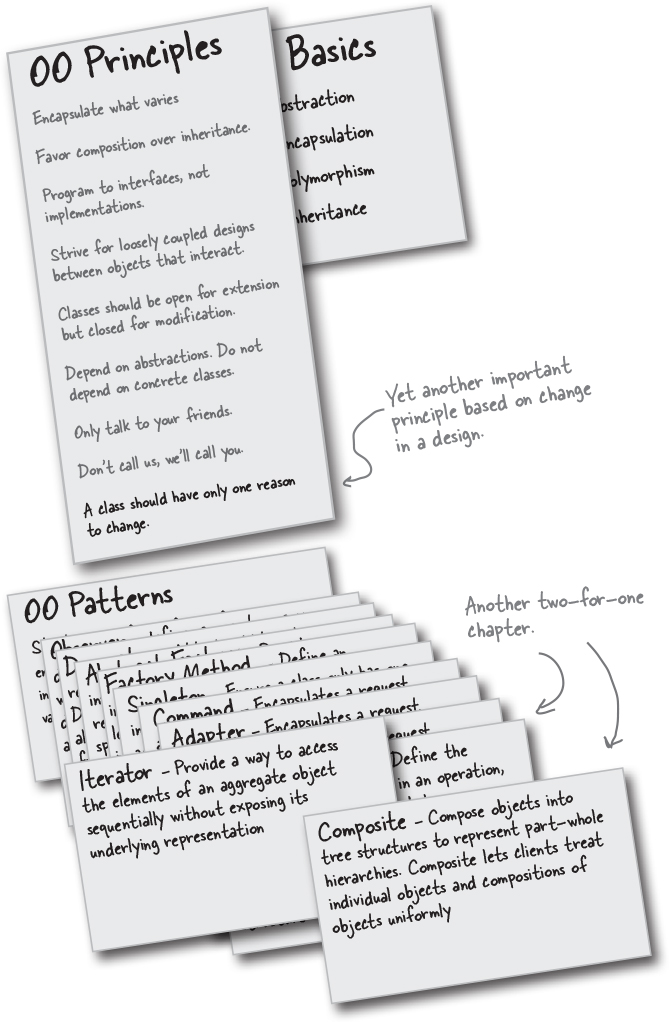

In [45]:
from abc import ABC, abstractmethod

class Iterator(ABC):

  @abstractmethod
  def has_next(self):
    pass

  @abstractmethod
  def next(self):
    pass

class Listiterator(Iterator):
  def __init__(self, collection):
    self._collection = collection
    self._index = 0

  def has_next(self):
    return (self._index < len(self._collection))

  def next(self):
    if (self.has_next()):
      result = self._collection[self._index]
      self._index += 1
      return result
    else:
      raise StopIteration

class Reverselistiterator(Iterator):
  def __init__(self, collection):
    self._collection = collection
    self._index = len(collection) - 1

  def has_next(self):
    return self._index >= 0

  def next(self):
    if (self.has_next()):
      result = self._collection[self._index]
      self._index -= 1
      return result
    else:
      raise StopIteration

class Filteredlistiterator(Iterator):
  def __init__(self, collection):
    self._collection = collection
    self._index = 0

  def has_next(self):
    while self._index < len(self._collection) and self._collection[self._index] % 2 == 0:
        self._index += 1
    return self._index < len(self._collection)

  def next(self):
    if (self.has_next()):
      result = self._collection[self._index]
      self._index += 1
      return result
    else:
      raise StopIteration

class Collection():
  def __init__(self):
    self.items = []

  def add_item(self, item):
    self.items.append(item)

  def createiterator(self):
    return Listiterator(self.items)

  def createreverseiterator(self):
    return Reverselistiterator(self.items)

  def createfilterediterator(self):
    return Filteredlistiterator(self.items)

collectionofshoes = Collection()
collectionofshoes.add_item("black shoes")
collectionofshoes.add_item("white shoes")
collectionofshoes.add_item("brown shoes")
iterator_collectionofshoes = collectionofshoes.createiterator()
reverseiterator_collectionofshoes = collectionofshoes.createreverseiterator()

while iterator_collectionofshoes.has_next():
  print(iterator_collectionofshoes.next())

print("\n")

while reverseiterator_collectionofshoes.has_next():
  print(reverseiterator_collectionofshoes.next())

numberscollection = Collection()
numberscollection.add_item(1)
numberscollection.add_item(2)
numberscollection.add_item(3)
numberscollection.add_item(4)
numberscollection.add_item(5)
filterediterator_numberscollection = numberscollection.createfilterediterator()

print("\n")
while filterediterator_numberscollection.has_next():
  print(filterediterator_numberscollection.next())

black shoes
white shoes
brown shoes


brown shoes
white shoes
black shoes


1
3
5


In [58]:
from abc import ABC, abstractmethod

class Component(ABC):
  @abstractmethod
  def operation(self):
    pass

class Leaf(Component):
  def __init__(self, name):
    self.name = name

  def operation(self):
    return f"operating from a leaf {self.name}\n"

class Composite(Component):
  def __init__(self, name):
    self.children = []
    self.name = name

  def add(self, component):
    self.children.append(component)

  def remove(self, component):
    self.children.remove(component)

  def operation(self):
    result = f"operating from a composite {self.name} \n"
    for child in self.children:
      result += child.operation()
    return result

parentcomponent = Composite("parent")
leaf1 = Leaf("one")
leaf2 = Leaf("two")
leaf3 = Leaf("three")
leaf4 = Leaf("four")
compositechild = Composite("childcomposite")
compositechild.add(leaf3)
compositechild.add(leaf4)

parentcomponent.add(leaf1)
parentcomponent.add(leaf2)
parentcomponent.add(compositechild)
print(parentcomponent.operation())

operating from a composite parent 
operating from a leaf one
operating from a leaf two
operating from a composite childcomposite 
operating from a leaf three
operating from a leaf four



In [83]:
class Filessystemcomponent(ABC):
  @abstractmethod
  def show_details(self, indent=0):
    pass

class File(Filessystemcomponent):
  def __init__(self, name):
    self.name = name

  def show_details(self, indent=0):
    print(" " * indent + f"{self.name}")

class Directory(Filessystemcomponent):
  def __init__(self, name):
    self.name = name
    self.children = []

  def add(self, component):
    self.children.append(component)

  def remove(self, component):
    self.children.remove(component)

  def show_details(self, indent=0):
    print(" " * indent + f"{self.name}")
    for child in self.children:
      child.show_details(indent +  2)

dir1 = Directory("dir1")
dir2 = Directory("dir2")
dir3 = Directory("dir3")
file1 = File("file1")
file2 = File("file2")
file3 = File("file3")

dir1.add(file1)
dir1.add(file2)
dir1.add(dir2)
dir2.add(file3)
dir2.add(dir3)
dir3.add(file1)
dir3.add(file2)

dir1.show_details()

dir1
  file1
  file2
  dir2
    file3
    dir3
      file1
      file2


In [90]:
from abc import ABC, abstractmethod

class MenuComponent(ABC):
    @abstractmethod
    def display(self, indent=0):
        pass

class MenuItem(MenuComponent):
    def __init__(self, name, price):
        self._name = name
        self._price = price

    def display(self, indent=0):
        print(" " * indent + f"{self._name} ${self._price}")

class Menu(MenuComponent):
    def __init__(self, name):
        self._name = name
        self._items = []

    def add(self, component: MenuComponent):
        self._items.append(component)

    def remove(self, component: MenuComponent):
        self._items.remove(component)

    def display(self, indent=0):
        print(" " * indent + f"{self._name}")
        for item in self._items:
            item.display(indent + 2)


item1 = MenuItem("Burger", 8.99)
item2 = MenuItem("Fries", 2.99)
item3 = MenuItem("Coke", 1.99)
item4 = MenuItem("Salad", 4.99)


main_menu = Menu("Main Menu")
lunch_menu = Menu("Lunch Menu")
drinks_menu = Menu("Drinks Menu")


lunch_menu.add(item1)
lunch_menu.add(item2)
drinks_menu.add(item3)


main_menu.add(lunch_menu)
main_menu.add(drinks_menu)


main_menu.add(item4)

main_menu.display()


Main Menu
  Lunch Menu
    Burger $8.99
    Fries $2.99
  Drinks Menu
    Coke $1.99
  Salad $4.99


# state pattern

- The State Pattern allows an object to change its behavior dynamically when its internal state changes, giving the illusion that the object's class has changed.
- It eliminates the need for complex conditionals (`if-else`, `switch-case`) that depend on the object’s state.
- Encapsulates state-specific behavior into separate state classes that implement a common interface.
- Uses **Context** class to maintain a reference to the current state object and delegate behavior to it.
- Concrete state classes implement the **State Interface**, ensuring each state follows a consistent structure while handling its own transitions.
- Behavior shifts occur by changing the state object within the context rather than modifying the context’s code.
- Each concrete state is responsible for knowing which state to transition into next, making the system more scalable and maintainable.
- Reduces code duplication and ensures the Open-Closed Principle (OCP) by allowing you to add new states without modifying existing code.
- Useful when objects must change behavior depending on a finite number of states, such as vending machines, traffic lights, media players, or document workflow systems.
- Follows the **Single Responsibility Principle (SRP)** by separating state management and behavior implementation into dedicated classes.
- Promotes polymorphism: state transitions are determined dynamically at runtime, improving flexibility.
- Enhances clarity by replacing complex conditional structures with simpler and more maintainable state transitions.
- **Pros**: Clear structure, scalability, maintainability, adherence to SOLID principles, flexibility in state transitions, easier to test.
- **Cons**: Can lead to many small, closely related classes, which might increase the overhead of managing state objects.
- **Problem mitigations**: If the number of states grows too large, abstract common behavior in base classes or shared helpers to avoid duplication.
- Use in scenarios where behavior changes across different states must be handled explicitly, like in UI elements (buttons, form submissions), or hardware control systems.
- Context objects may store additional data that can be shared across states (e.g., stock in a vending machine).
- State transitions should be well-defined to avoid unintended transitions between states, requiring careful planning of state changes.
- Consider lazy initialization if state creation is costly, ensuring that state objects are only created when necessary.
- May introduce slight performance overhead due to the delegation to state objects and the increased number of objects created.
- Works well with finite state machines or workflow systems, where the flow of states is predictable and predefined.
- While the pattern can be overkill for simple scenarios, it shines in cases where state-specific behavior varies significantly or grows over time.
- Testing becomes easier since each state can be tested in isolation, and state transitions can be verified independently from the rest of the context's behavior.
- The main challenge is ensuring that all possible state transitions are accounted for, especially when adding new states, to avoid runtime errors due to missing transitions.

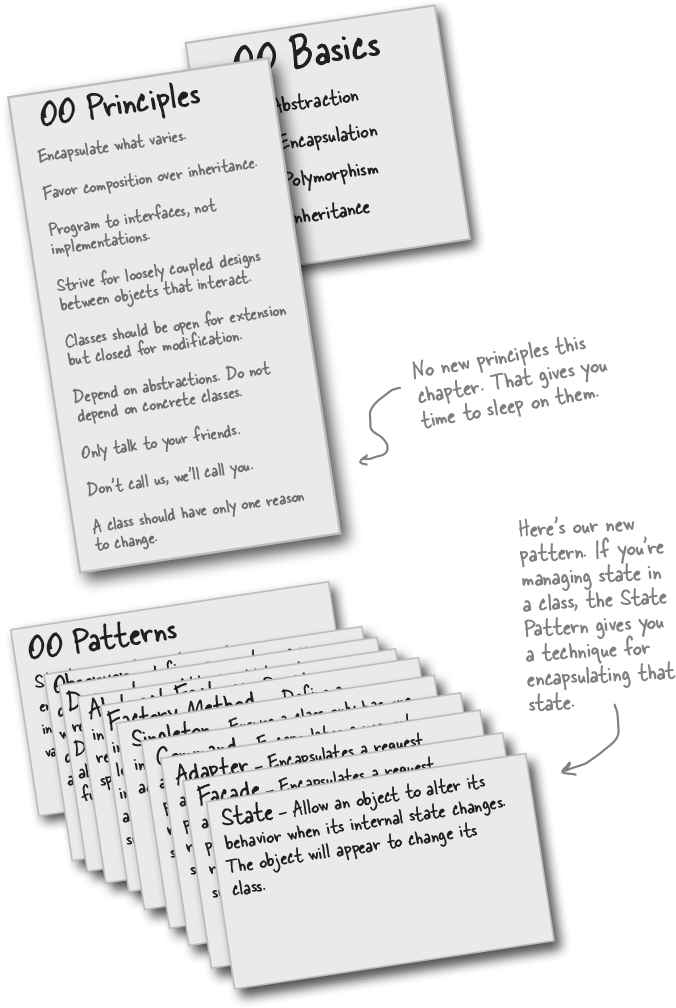

In [9]:
from abc import ABC, abstractmethod

class Trafficlight:
  def __init__(self):
    self.state = Greenlight()

  def change_state(self):
    self.state.handle(self)

class Trafficlightstates(ABC):
  @abstractmethod
  def handle(self, light):
    pass

class Greenlight(Trafficlightstates):
  def handle(self, light):
    print("Greenlight")
    light.state = Yellowlight()

class Yellowlight(Trafficlightstates):
  def handle(self, light):
    print("Yellowlight")
    light.state = Redlight()

class Redlight(Trafficlightstates):
  def handle(self, light):
    print("Redlight")
    light.state = Yellowlight()

trafficlight = Trafficlight()
trafficlight.state = Greenlight()

for i in range(10):
  trafficlight.change_state()

Greenlight
Yellowlight
Redlight
Yellowlight
Redlight
Yellowlight
Redlight
Yellowlight
Redlight
Yellowlight


In [12]:
from abc import ABC, abstractmethod

class VendingMachineState(ABC):
    @abstractmethod
    def insert_money(self, machine):
        pass

    @abstractmethod
    def select_product(self, machine):
        pass

    @abstractmethod
    def dispense(self, machine):
        pass

class IdleState(VendingMachineState):
    def insert_money(self, machine):
        print("Money inserted. You can select a product now.")
        machine.state = HasMoneyState()

    def select_product(self, machine):
        print("Insert money first.")

    def dispense(self, machine):
        print("No product selected. Insert money first.")

class HasMoneyState(VendingMachineState):
    def insert_money(self, machine):
        print("Money already inserted. Select a product.")

    def select_product(self, machine):
        if machine.stock > 0:
            print("Product selected. Dispensing now...")
            machine.state = DispensingProductState()
        else:
            print("Product out of stock!")
            machine.state = OutOfStockState()

    def dispense(self, machine):
        print("Select a product first.")

class DispensingProductState(VendingMachineState):
    def insert_money(self, machine):
        print("Please wait, already dispensing product.")

    def select_product(self, machine):
        print("Please wait, already dispensing product.")

    def dispense(self, machine):
        print("Dispensing the product. Please take your product.")
        machine.stock -= 1
        if machine.stock > 0:
            machine.state = IdleState()
        else:
            machine.state = OutOfStockState()

class OutOfStockState(VendingMachineState):
    def insert_money(self, machine):
        print("Out of stock. Cannot accept money.")

    def select_product(self, machine):
        print("Out of stock.")

    def dispense(self, machine):
        print("Out of stock. Cannot dispense any products.")

class VendingMachine:
    def __init__(self, stock):
        self.stock = stock
        self.state = IdleState()

    def insert_money(self):
        self.state.insert_money(self)

    def select_product(self):
        self.state.select_product(self)

    def dispense(self):
        self.state.dispense(self)

machine = VendingMachine(5)

machine.insert_money()
machine.select_product()
machine.dispense()

Money inserted. You can select a product now.
Product selected. Dispensing now...
Dispensing the product. Please take your product.


# proxy pattern

- The Proxy Pattern provides a surrogate or placeholder for another object to control access to it, managing or adding functionality.
- Types of proxies: **Virtual Proxy** (lazy initialization, controls creation of expensive objects), **Protection Proxy** (controls access with security checks), **Remote Proxy** (handles communication with a remote object), **Caching Proxy** (stores results of expensive operations), and **Smart Proxy** (adds extra functionality like reference counting or locking).
- Proxies implement the same interface as the real object, making the use of the proxy transparent to the client.
- The client interacts with the proxy as if it were the real object; the proxy decides whether to forward requests or handle them directly.
- Proxies can control when and how the real object is instantiated (e.g., **lazy loading** in a virtual proxy delays object creation until it's needed).
- **Implementation**: The proxy wraps the real object (composition), forwards method calls, and may introduce additional logic before or after forwarding.
- **Remote Proxy** manages network communication, serializing requests and deserializing responses when working with remote services.
- **Protection Proxy** adds access control, enforcing authentication, authorization, or security policies before allowing method execution.
- **Caching Proxy** stores and returns cached data for frequently requested operations, reducing expensive or redundant computations (e.g., API calls, database queries).
- Proxies enable **single responsibility** by isolating additional behavior (caching, access control, logging) from the core logic of the real object.
- **Why useful**: Provides control over access, performance optimization, security, and object lifecycle management. It hides complexity from the client.
- **Use cases**: Remote services (e.g., accessing a remote database or API), security filters, expensive object creation (e.g., large data sets), caching frequently accessed resources, smart pointers in memory management.
- **Example**: Virtual Proxy for loading a large image file only when needed, protecting resources; caching proxy for reusing weather API data and improving performance.
- **Design principles**: Follows the **Open/Closed Principle** (can extend with new proxies without changing the real object) and **Single Responsibility Principle** (proxy focuses on controlling access or adding behavior).
- **Pros**:
  - Adds layers of control over object access and management without altering the client code.
  - Improves performance with caching and lazy loading (Virtual Proxy).
  - Enhances security with access control (Protection Proxy).
  - Simplifies distributed computing by abstracting remote object communication (Remote Proxy).
  - Maintains transparency: the client isn’t aware of whether it’s interacting with a proxy or the real object.
- **Cons**:
  - Adds complexity to the system by introducing more components (additional logic in proxies).
  - Potential performance bottlenecks if the proxy itself becomes a resource-intensive layer.
  - Stale data or consistency issues in caching proxies if the cache isn’t properly synchronized or invalidated.
  - Security vulnerabilities in Remote Proxy if not properly secured.
- **Problems & Mitigations**:
  - **Latency** in Remote Proxy due to network delays can be mitigated by asynchronous communication or retries.
  - **Stale Cache** in Caching Proxy can be managed with expiration policies, cache invalidation, or distributed cache updates.
  - **Memory overhead** in Caching Proxy can be reduced using LRU (Least Recently Used) or other eviction policies to discard unused data.
  - **Access control bypassing** in Protection Proxy can be mitigated with proper enforcement of security checks at every entry point.
  - **Complexity** of managing multiple proxies can be addressed by adhering to clear separation of concerns and modular design.
- Real-world examples: **Web browser** caching resources like images, **CDNs** storing web content close to users, **firewalls** (Protection Proxy) regulating network access, **smart pointers** in C++ managing object lifetimes.
- Proxy vs Decorator: Both patterns wrap an object, but the proxy controls access, while the decorator adds behavior dynamically without altering control.

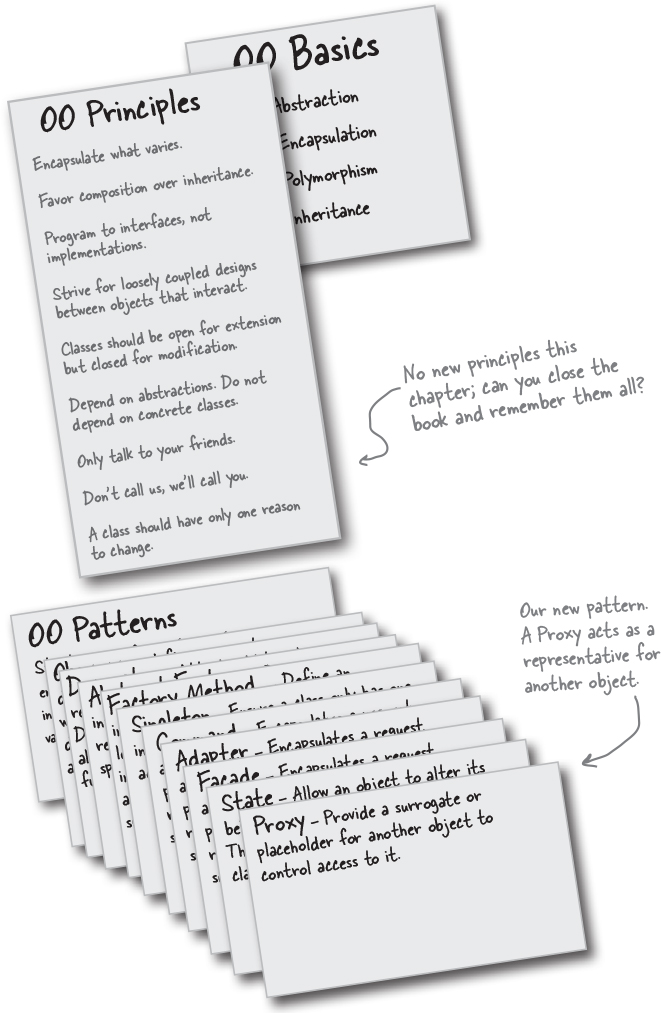

In [18]:
# virtual proxy
# implement a virtual proxy to delay the creation of an object that is resource-intensive to initialize,
# such as a large image file that needs to be loaded from disk.

from abc import ABC, abstractmethod

class Image(ABC):
    @abstractmethod
    def display(self):
        pass

class RealImage(Image):
    def __init__(self, filename):
        self.filename = filename
        self.load_image_from_disk()

    def load_image_from_disk(self):
        print(f"Loading image '{self.filename}' from disk...")

    def display(self):
        print(f"Displaying image '{self.filename}'.")

class ProxyImage(Image):
    def __init__(self, filename):
        self.filename = filename
        self.real_image = None

    def display(self):
        if self.real_image is None:
            self.real_image = RealImage(self.filename)
        self.real_image.display()

image = ProxyImage("image1.jpg")
image.display()
image.display()

Loading image 'image1.jpg' from disk...
Displaying image 'image1.jpg'.
Displaying image 'image1.jpg'.


In [25]:
# protection proxy
# Imagine you’re managing a sensitive document system.
# Some users have read access, while others have write access.
# A protection proxy can control access to ensure only authorized users can perform specific operations like viewing or editing the document.

from abc import ABC, abstractmethod

class Document(ABC):
    @abstractmethod
    def read(self):
        pass

    @abstractmethod
    def write(self, content):
        pass

class RealDocument(Document):
    def __init__(self, filename):
        self.filename = filename
        self.content = ""

    def read(self):
        print(f"Reading document: {self.content}")

    def write(self, content):
        self.content = content
        print(f"Writing to document: {self.content}")

class DocumentProtectionProxy(Document):
    def __init__(self, filename, user_role):
        self.real_document = RealDocument(filename)
        self.user_role = user_role

    def read(self):
        if self.user_role in ['reader', 'editor']:
            self.real_document.read()
        else:
            print("Access denied: You don't have permission to read this document.")

    def write(self, content):
        if self.user_role == 'editor':
            self.real_document.write(content)
        else:
            print("Access denied: You don't have permission to edit this document.")

reader = DocumentProtectionProxy("document.txt", "reader")
reader.read()

editor = DocumentProtectionProxy("document.txt", "editor")
editor.read()
editor.write("New content")
editor.read()

Reading document: 
Reading document: 
Writing to document: New content
Reading document: New content


In [28]:
# remote proxy
# imagine that the actual bank account object resides on a remote server.
# The Remote Proxy acts as a local placeholder, handling the network communication needed to access the real bank account.

from abc import ABC, abstractmethod

class BankAccount(ABC):
    @abstractmethod
    def get_balance(self):
        pass

    @abstractmethod
    def deposit(self, amount):
        pass

class RealBankAccount(BankAccount):
    def __init__(self):
        self.balance = 0

    def get_balance(self):
        return self.balance

    def deposit(self, amount):
        self.balance += amount
        return self.balance

import random
import time

class RemoteBankAccountProxy(BankAccount):
    def __init__(self):
        # Simulating a remote connection to a bank server
        self.remote_bank_account = None

    def connect_to_server(self):
        print("Connecting to remote bank server...")
        time.sleep(1)  # Simulate network latency
        if random.random() > 0.2:  # Simulate successful connection 80% of the time
            self.remote_bank_account = RealBankAccount()
            print("Connected to remote server.")
        else:
            print("Failed to connect to the remote server.")
            self.remote_bank_account = None

    def get_balance(self):
        self.connect_to_server()
        if self.remote_bank_account:
            balance = self.remote_bank_account.get_balance()
            print(f"Balance retrieved: {balance}")
            return balance
        else:
            print("Unable to retrieve balance.")
            return None

    def deposit(self, amount):
        self.connect_to_server()
        if self.remote_bank_account:
            balance = self.remote_bank_account.deposit(amount)
            print(f"Deposited {amount}, new balance: {balance}")
            return balance
        else:
            print("Unable to deposit funds.")
            return None

proxyaccount = RemoteBankAccountProxy()
proxyaccount.get_balance()
proxyaccount.deposit(100)

Connecting to remote bank server...
Connected to remote server.
Balance retrieved: 0
Connecting to remote bank server...
Failed to connect to the remote server.
Unable to deposit funds.


In [29]:
# cache proxy
# Imagine an application fetching weather data from an external API.
# Accessing the API is an expensive operation (network delays, rate limits), so we use a caching proxy to store the data and reduce redundant API calls.

from abc import ABC, abstractmethod
import random
import time

class WeatherService(ABC):
    @abstractmethod
    def get_weather(self, location):
        pass

class RealWeatherService(WeatherService):
    def get_weather(self, location):
        print(f"Fetching weather data for {location}...")
        time.sleep(2)  # Simulate network latency
        return random.randint(60, 100)  # Simulate weather temperature

class WeatherServiceCacheProxy(WeatherService):
    def __init__(self):
        self.weather_service = RealWeatherService()
        self.cache = {}  # Cache to store weather data

    def get_weather(self, location):
        if location in self.cache:
            print(f"Returning cached weather data for {location}")
            return self.cache[location]
        else:
            weather = self.weather_service.get_weather(location)
            self.cache[location] = weather
            return weather

weatherservice = WeatherServiceCacheProxy()
weatherservice.get_weather("New York")
weatherservice.get_weather("London")
weatherservice.get_weather("New York")

Fetching weather data for New York...
Fetching weather data for London...
Returning cached weather data for New York


88